# Feature Engineering: Transformations

*Examples of transformations:*
- power transformations (square, square root, etc.)
- standardizing data
  
An example of why we might need to transform the data would be if we have a very skewed dataset with a lot of outliers, in that case log transformation might be applied. It will help the model draw correlations and better understand the data without trying to overfit to that long tail and those outliers.  
Standardizing - transforming all the data to be on the same scale.

## Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

## Create the two new features

In [2]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


## Plot the two new features  

On the last lesson we looked at the normalized overlayed histograms, but we didn't look at the full histogram so we're still not exactly sure what the full distribution looks like for these new features.  
What we are looking for here is a dramatic skew with a really long tail or maybe a few outliers. These are scenarios that would make a feature a prime candidate for transformation.

In [3]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

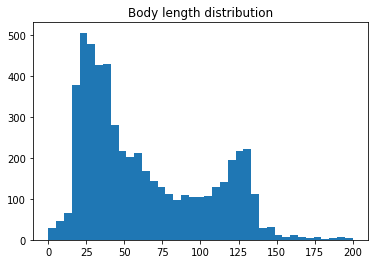

In [4]:
# plot body length distribution

bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
# last time we filtered our data frame, this time we want the entire histogram, not just where the label was 'spam' or 'ham'.
# in other words, we want to see the full distribution, using bin cut points. 
# We're not passing in alpha, normed or label parameters, bcz we're not comparing two different distributions
pyplot.title("Body length distribution")
pyplot.show()


*We see here kind of bimodal distribution with two different spikes, bcz spam messages are tend to be longer, and real messages tend to be shorter*  
We wouldn't say that his is a great candidate for transformation though, bcz it's not really heavily skewed and there's not really any clear outliers.

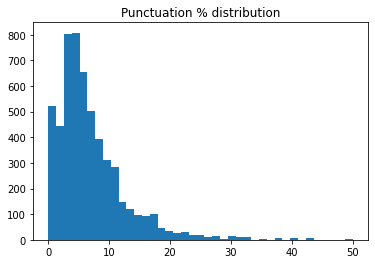

In [5]:
# plot punctuation % distribution

bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % distribution")
pyplot.show()

*This one could very well be a nice distribution for a transformation. It's fairly skewed here, where we see a lot close to zero, and then we see this tail out here extending all the way up to 40 with some of these outliers out here*  
  
So, we're going to focus on this feature for our transformations.

# TRANSFORMATION

Process that alters each data point in a certain column in a systematic way (e.g. - x², √x), that makes it cleaner for a model to use.
  
![transformation.png](transformation.png)  

Let's say a distribution for a certain feature has a long right tail. Then the transformation would aim to pull that tail in to make it a more compact distribution.  
We do this so that the model doesn't get distracted, trying to chase down outliers in that tail.

## Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |
  


Transformation example:  

![transformation_example.png](transformation_example.png)  

**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

1) *In our case we will use a range from -2 to 2, it is a commonly used range.*
1) ...
2) *For now we're just going to plot everything in a histogram and pick the one that looks the most like a normal distribution.*

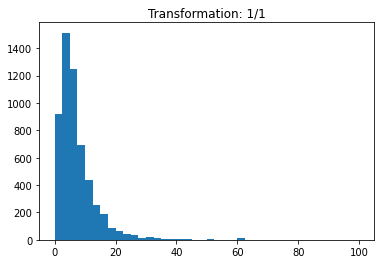

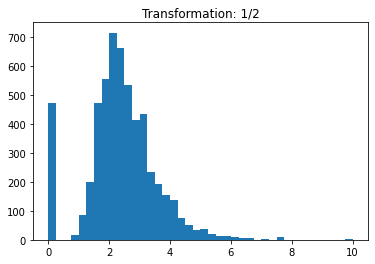

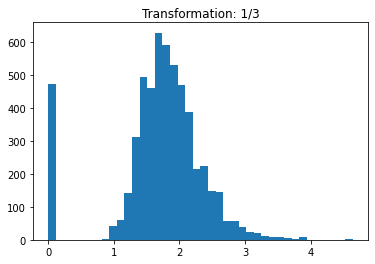

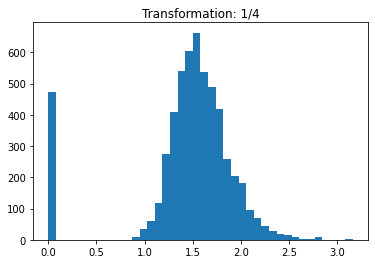

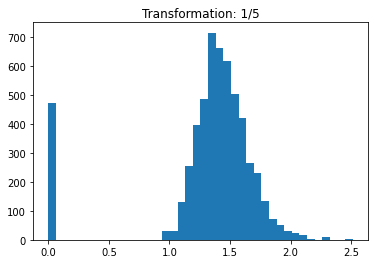

In [7]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i), bins=40)
    pyplot.title(f"Transformation: 1/{str(i)}")
    pyplot.show()

Given these examples we would choose a transformation to be either one forth or one fifth.  
  
Stack on the left - zeroes, it means that there is no punctuation. So any power transformation of zero is just going to keep it at zero.